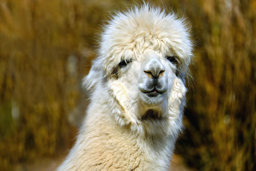

In [40]:
from duckduckgo_search import DDGS
from fastcore.all import *
import time
from fastai.vision.all import *

urls = search_images('alpaca photos', max_images=2)
urls[0]
dest = 'alpaca.jpg'
download_url(urls[1], dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256, 256)

In [37]:


def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


searches = ['llama_animal', 'alpaca_animal']
path = Path('llama_or_alpaca')

for search in searches:
    dest = path / search
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{search} photo'))
    time.sleep(5)
    resize_images(dest, max_size=400, dest=dest)

In [43]:

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

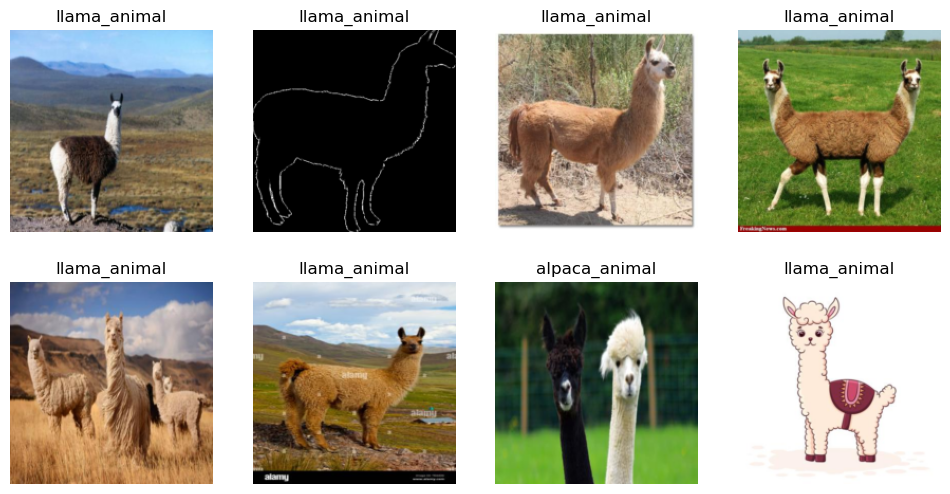

In [44]:
# here ImageBlock is a PILImage and CategoryBlock is a str
# fastai ImageBlock transforms the image to a tensor
# fastai CategoryBlock transforms the label to a tensor
# blocks option is a tuple of the blocks to use for the data block
# types of blocks:
# TransformBlock: a block that applies a transformation to the data
# CategoryBlock: a block that applies a transformation to the label
# ImageBlock: a block that applies a transformation to the image
# TextBlock: a block that applies a transformation to the text
# TensorBlock: a block that applies a transformation to the tensor

# item_tfms: a list of transformations to apply to the data
# options for item_tfms are:
# Resize: Resize the image to a given size
# RandomResizedCrop: Randomly crop and resize the image
# RandomErasing: Randomly erase a part of the image
# RandomRotation: Randomly rotate the image
# RandomFlip: Randomly flip the image
# RandomGrayscale: Randomly convert the image to grayscale
# RandomPerspective: Randomly apply perspective transformation to the image
# RandomAffine: Randomly apply affine transformation to the image
# RandomPerspective: Randomly apply perspective transformation to the image
# RandomAffine: Randomly apply affine transformation to the image
# RandomPerspective: Randomly apply perspective transformation to the image
# RandomAffine: Randomly apply affine transformation to the image

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=8)

In [45]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
# resnet18 is a pre-trained model
# metrics is a list of metrics to evaluate the model
# error_rate is a metric that measures the percentage of incorrect predictions
# fine_tune is a method that fine-tunes the model
# 3 is the number of epochs to train the model

learn.fine_tune(10)

is_alpaca, _, probs = learn.predict(PILImage.create('alpaca.jpg'))
print(f"This is a: {is_alpaca}.")
print(f"Probability it's an alpaca: {probs[0]:.4f}")

epoch,train_loss,valid_loss,error_rate,time
0,0.932596,0.536501,0.205479,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.573571,0.377114,0.150685,00:01
1,0.419472,0.485510,0.150685,00:01
2,0.396348,0.457639,0.123288,00:01
3,0.380652,0.505949,0.116438,00:01
4,0.338006,0.528602,0.130137,00:01
5,0.326994,0.517573,0.130137,00:01
6,0.294924,0.475785,0.150685,00:01
7,0.267159,0.449820,0.136986,00:01
8,0.236125,0.450260,0.136986,00:01
9,0.217157,0.435030,0.136986,00:01


This is a: alpaca_animal.
Probability it's an alpaca: 0.9121
